# 深度学习与深层神经网路

1. 深度学习就是深层神经网络的代名词
2. 深度学习最重要的两个特性
   + 多层
   + 非线性

## 线性模型的局限性

最早的神经网络采用线性模型

$$
y=\sum_{i}w_ix_i+b
$$

$$
a^{(1)}=xW^{(1)},y=a^{(1)}W^{(2)}
$$

$$
y=(xW^{(1)})W^{(2)}\rightarrow y=x(W^{(1)}W^{(2)})=xW^{'}
$$

$$
  y=xW^{'}=\left[
      \begin{array}{cc}
      x_1 & x_2
      \end{array}
      \right]\left[
          \begin{array}{c}
          W_1^{'} \\
  W_2^{'}
          \end{array}
          \right]=\left[
              \begin{array}{cc}
              W_{1}^{'}x_1 & W_2^{'} x_2
              \end{array}
              \right]
$$

线性模型不能解决异或问题。

![异或](./xor.jpg)

## 激活函数实现去线性化

如何做的？

![加入非线性的激活函数图](./nonlinear.png)

$$
\begin{aligned} A_{1} &=\left[a_{11}, a_{12}, a_{13}\right]=f\left(x W^{(1)}+b\right)=f\left(\left[x_{1}, x_{2}\right]\left[\begin{array}{ccc}{W_{1,1}^{(1)}} & {W_{1,2}^{(1)}} & {W_{1,3}^{(1)}} \\ {W_{2,1}^{(1)}} & {W_{2,2}^{(1)}} & {W_{2,3}^{(1)}}\end{array}\right]+\left[\begin{array}{lll}{b_{1}} & {b_{2}} & {b_{3}}\end{array}\right]\right) \\ &=f\left(\left[W_{1,1}^{(1)} x_{1}+W_{2,1}^{(1)} x_{2}+b_{1}, W_{1,2}^{(1)} x_{1}+W_{2,2}^{(1)} x_{2}+b_{2}, W_{1,3}^{(1)} x_{1}+W_{2,3}^{(1)} x_{2}+b_{3}\right]\right) \\ &=\left[f\left(W_{1,1}^{(1)} x_{1}+W_{2,1}^{(1)} x_{2}+b_{1}\right), f\left(W_{1,2}^{(1)} x_{1}+W_{2,2}^{(1)} x_{2}+b_{2}\right), f\left(W_{1,3}^{(1)} x_{1}+W_{2,3}^{(1)} x_{2}+b_{3}\right)\right] \end{aligned}
$$

常用的激活函数

![常用的激活函数](./act.png)


In [ ]:
a = tf.nn.relu(tf.matmul(x,w1)+base1)
b = tf.nn.relu(tf.matmul(a,w2)+base2)


## 多层神经网络解决异或语言

感知机理论上不可以的原因？（这个可以列一个专题来讲）FIXME 参考书籍《Perceptions:An Introtudction to Computational Geometry》 MIT Press,1969

![perception](./perc.png)

![deep](./deep.png)

可以看到通过隐藏层，我们可以抽象出更为高维的信息。这些信息就可以用来分类数据。从而得到更好的分类结果。

# 损失函数

## 经典损失函数


### 分类问题

神经网络如何输出多分类问题。比如3分类问题。苹果、香蕉、梨。


$$
\mbox{苹果}=\left(
    \begin{array}{c}
    1 \\
    0 \\
    0
    \end{array}
    \right),\mbox{香蕉}=\left(
        \begin{array}{c}
        0 \\
        1 \\
        0
        \end{array}
        \right),\mbox{梨}=\left(
            \begin{array}{c}
            0 \\
            0 \\
            1
            \end{array}
            \right)
$$

如何比较输出值与预期值之间的差距？ *交叉熵*。

交叉熵是用来衡量两个概率分布之间的距离的函数。它是分类问题中比较常见的损失函数。其定义为

$$
H(p,q)=-\sum_{x}p(x)log[q(x)]
$$

如何将神经网络的结果变成一个概率分布？使用softmax函数。

![softchange](./softchange.png)

加入神经网络的原始输出为$\{y_1,y_2,...,y_n\}$

$$
\operatorname{softmax}(y)_{i}=y_{i}^{\prime}=\frac{e^{y i}}{\sum_{j=1}^{n} e^{y j}}
$$

这个函数满足，概率分布的所有条件。这样就把神经网络的输出改成了一个概率分布。这样就可以计算交叉熵了。

但是需要注意的一点是交叉熵并不是对称的

$$
H(p,q)\neq H(q,p)
$$

比如我们可以这样来表述交叉熵$H(p,q)$,用q来刻画p的困哪程度。



In [ ]:
cross_entropy = -tf.reduce_mean(y_ * tf.log(tf.clip_by_value(y, le-10, 1.0)))

In [1]:
import tensorflow as tf

with tf.Session() as sess:
    v = tf.constant([[1.0,2.0,3.0], [4.0,5.0,6.0]])
    print("--->",tf.clip_by_value(v, 2.5, 4.5).eval())
    v = tf.constant([1.0, 2.0, 3.0])
    print("--->", tf.log(v).eval())
    vl = tf.constant([[1.0, 2.0], [3.0 , 4.0]])
    v2 = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    print("--->", (vl *v2).eval())
    print("--->", tf.matmul(vl , v2).eval())

---> [[2.5 2.5 3. ]
 [4.  4.5 4.5]]
---> [0.        0.6931472 1.0986123]
---> [[ 5. 12.]
 [21. 32.]]
---> [[19. 22.]
 [43. 50.]]


$$
\left(
    \begin{array}{cc}
    1 & 2 \\
    3 & 4
    \end{array}
    \right)*\left(
        \begin{array}{cc}
        5 & 6 \\
        7 & 8
        \end{array}
        \right)=\left(
            \begin{array}{cc}
            5 & 12 \\
            21 & 32
            \end{array}
            \right)
$$

In [15]:
import tensorflow as tf

with tf.Session() as sess:
    v = tf.constant([[1.0,2.0,3.0],[4.0,5.0,6.0]])
    print("--->", tf.reduce_mean(v).eval())

---> 3.5


$$
\frac{1+2+3+4+5+6}{6}=3.5
$$

tensforlow 提供了连个合并softmax和交叉熵的公式


In [ ]:
cross_entropy= tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)

$y$ 代表神经网络的输出，而$y\_$代表的标准答案。如果只有一个正确答案的分类问题中可以使用另外的一个函数

In [ ]:
cross_entropy= tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_, logits=y)

### 回归问题

回归问题一般采用的损失函数未均方误差。

$$
\operatorname{MSE}\left(y, y^{\prime}\right)=\frac{\sum_{i=1}^{n}\left(y_{i}-y_{i}^{\prime}\right)^{2}}{n}
$$

In [ ]:
mse =  tf.reduce_mean(tf.square(y_ - y))

## 自定义损失函数

In [2]:
import tensorflow as tf
from numpy.random import RandomState

定义神经网络的相关参数和变量。

In [16]:
batch_size = 8
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')
w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)

设置自定义的损失函数

$$
\operatorname{Loss}\left(y, y^{\prime}\right)=\sum_{i=1}^{n} f\left(y_{i}, y_{i}^{\prime}\right), \quad f(x, y)=\left\{\begin{array}{ll}{a(x-y)} & {x>y} \\ {b(y-x)} & {x \leqslant y}\end{array}\right.
$$

In [17]:
# 定义损失函数使得预测少了的损失大，于是模型应该偏向多的方向预测。
loss_less = 10
loss_more = 1
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

In [18]:
import tensorflow as tf
v1 = tf.constant([1.0, 2.0, 3.0, 4.0])
v2 = tf.constant([4.0, 3.0, 2.0, 1.0])
sess = tf.InteractiveSession()
print(tf.greater(v1, v2) .eval()) #输出[False False True True]
print(tf.where(tf.greater(v1, v2), v1, v2).eval()) #输出[4. 3. 3. 4.J
sess.close ()

[False False  True  True]
[4. 3. 3. 4.]


生成模拟数据集。

In [13]:
rdm = RandomState(1)
X = rdm.rand(128,2)
Y = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]

训练模型。

In [19]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.81031823]
 [ 1.4855988 ]] 



After 1000 training step(s), w1 is: 
[[0.01247112]
 [2.1385448 ]] 



After 2000 training step(s), w1 is: 
[[0.45567414]
 [2.1706066 ]] 



After 3000 training step(s), w1 is: 
[[0.69968724]
 [1.8465308 ]] 



After 4000 training step(s), w1 is: 
[[0.89886665]
 [1.2973602 ]] 



Final w1 is: 
 [[1.019347 ]
 [1.0428089]]


重新定义损失函数，使得预测多了的损失大，于是模型应该偏向少的方向预测。

In [21]:
loss = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.81031823]
 [ 1.4855988 ]] 



After 1000 training step(s), w1 is: 
[[-0.13337609]
 [ 1.8130922 ]] 



After 2000 training step(s), w1 is: 
[[0.321903 ]
 [1.5246348]] 



After 3000 training step(s), w1 is: 
[[0.67850214]
 [1.2529727 ]] 



After 4000 training step(s), w1 is: 
[[0.89474  ]
 [1.0859823]] 



Final w1 is: 
 [[0.9743756]
 [1.0243336]]


不同的损失函数会对训练得到的模型产生重要影响。

# 神经网络优化算法

反向传到的推导。另立专题 FIXME

## 梯度下降算法

$$y=x^2$$

求导数

$$y^{'}=2x$$

那么怎么迭代到函数最低点？

1. 随即取初始值比如8，学习率0.1
2. 迭代第一次

   $$6.4=8-2\times 8 * 0.1$$

3. 迭代第二次

   $$5.12=6.4-2\times 6.4 * 0.1$$

4. 迭代第第三次

   $$4.096=5.12-2\times 5.12 * 0.1$$


是这梯度下降算法的一般更新公式

$$
\theta_{n+1}=\theta_{n}-\delta \frac{\partial J(\theta_n)}{\partial \theta_n}
$$

## 共轭梯度下降算法

FIXME


## 问题

1. 可能陷入局部最优解。
2. 数据很大时，计算所有数据的梯度非常耗时。
3. 如何解决（随机梯度下降）
4. 随机梯度下降，缺点可能连局部最优都找不到。
5. 可以把数据划分为不同的batch来训练。

## 学习率

1. 假设我们要最小化函数  $y=x^2$, 选择初始点   $x_0=5$
2. 学习率为1的时候，x在5和-5之间震荡。

In [22]:
import tensorflow as tf
TRAINING_STEPS = 10
LEARNING_RATE = 1
x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)

train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        x_value = sess.run(x)
        print("After %s iteration(s): x%s is %f."% (i+1, i+1, x_value))

After 1 iteration(s): x1 is -5.000000.
After 2 iteration(s): x2 is 5.000000.
After 3 iteration(s): x3 is -5.000000.
After 4 iteration(s): x4 is 5.000000.
After 5 iteration(s): x5 is -5.000000.
After 6 iteration(s): x6 is 5.000000.
After 7 iteration(s): x7 is -5.000000.
After 8 iteration(s): x8 is 5.000000.
After 9 iteration(s): x9 is -5.000000.
After 10 iteration(s): x10 is 5.000000.


学习率为0.001的时候，下降速度过慢，在901轮时才收敛到0.823355。

In [23]:
TRAINING_STEPS = 1000
LEARNING_RATE = 0.001
x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)

train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 100 == 0:
            x_value = sess.run(x)
            print("After %s iteration(s): x%s is %f."% (i+1, i+1, x_value))

After 1 iteration(s): x1 is 4.990000.
After 101 iteration(s): x101 is 4.084646.
After 201 iteration(s): x201 is 3.343555.
After 301 iteration(s): x301 is 2.736923.
After 401 iteration(s): x401 is 2.240355.
After 501 iteration(s): x501 is 1.833880.
After 601 iteration(s): x601 is 1.501153.
After 701 iteration(s): x701 is 1.228794.
After 801 iteration(s): x801 is 1.005850.
After 901 iteration(s): x901 is 0.823355.


使用指数衰减的学习率，在迭代初期得到较高的下降速度，可以在较小的训练轮数下取得不错的收敛程度

$$
decayed\_learning\_rate=learning\_rate\times decay\_rate^{\frac{global\_step}{decay\_steps}}
$$

In [24]:
TRAINING_STEPS = 100
global_step = tf.Variable(0)
LEARNING_RATE = tf.train.exponential_decay(0.1, global_step, 1, 0.96, staircase=True)

x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y, global_step=global_step)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 10 == 0:
            LEARNING_RATE_value = sess.run(LEARNING_RATE)
            x_value = sess.run(x)
            print("After %s iteration(s): x%s is %f, learning rate is %f."% (i+1, i+1, x_value, LEARNING_RATE_value))


After 1 iteration(s): x1 is 4.000000, learning rate is 0.096000.
After 11 iteration(s): x11 is 0.690561, learning rate is 0.063824.
After 21 iteration(s): x21 is 0.222583, learning rate is 0.042432.
After 31 iteration(s): x31 is 0.106405, learning rate is 0.028210.
After 41 iteration(s): x41 is 0.065548, learning rate is 0.018755.
After 51 iteration(s): x51 is 0.047625, learning rate is 0.012469.
After 61 iteration(s): x61 is 0.038558, learning rate is 0.008290.
After 71 iteration(s): x71 is 0.033523, learning rate is 0.005511.
After 81 iteration(s): x81 is 0.030553, learning rate is 0.003664.
After 91 iteration(s): x91 is 0.028727, learning rate is 0.002436.


staircase 的作用

![staricase](./stair.png)

一般来说初始学习率、衰减系数和衰减速度都是根据经验设置的。

# 神经网络进一步优化

## 过拟合问题

![overfit](./overfit.png)

如何解决过拟合问题？引入正则化。正则化的思想就是在损失函数中加入刻画模型复杂程度的指标。

引入正则化只是，我们的优化不再是针对$J(\theta)$,而是$J(\theta)+\lambda R(w)$,其中$R(w),刻画的是模型的复杂程度.

1. L1 正则化

$$
R(w)=\|w\|_{1}=\sum\left|w_{i}\right|
$$

2. L2 正则化

$$
R(w)=\|w\|_{2}^{2}=\sum_{i}\left|w_{i}^{2}\right|
$$

### 两个正则化公式的特点。

1. L1可以使得参数更稀疏。也就是说有很多参数可能会编程0.
2. L2则不会。因为$0.01^2$后变得很小。对优化几乎没有贡献，参数不会那么快趋近于0.
3. L1不可导，L2可导。

### 实践中结合两种优化方式

$$
R(w)=\sum_{i} \alpha\left|w_{i}\right|+(1-\alpha) w_{i}^{2}
$$

### 举例子

1. 生成模拟数据集

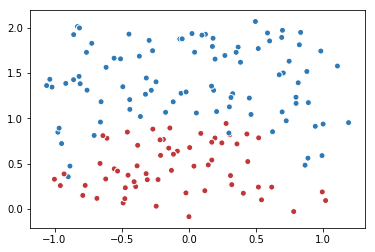

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data = []
label = []
np.random.seed(0)

# 以原点为圆心，半径为1的圆把散点划分成红蓝两部分，并加入随机噪音。
for i in range(150):
    x1 = np.random.uniform(-1,1)
    x2 = np.random.uniform(0,2)
    if x1**2 + x2**2 <= 1:
        data.append([np.random.normal(x1, 0.1),np.random.normal(x2,0.1)])
        label.append(0)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(1)

data = np.hstack(data).reshape(-1,2)
#label = np.hstack(label).reshape(-1, 1)

plt.scatter(data[:,0], data[:,1], c=label,
            cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.show()

2. 定义一个获取权重，并自动加入正则项到损失的函数。

In [37]:
def get_weight(shape, lambda1):
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambda1)(var))
    return var

3. 定义神经网络

In [44]:
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
sample_size = len(data)

# 每层节点的个数
layer_dimension = [2,10,5,3,1]

n_layers = len(layer_dimension)

cur_layer = x
in_dimension = layer_dimension[0]

# 循环生成网络结构
for i in range(1, n_layers):
    out_dimension = layer_dimension[i]
    weight = get_weight([in_dimension, out_dimension], 0.003)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    cur_layer = tf.nn.elu(tf.matmul(cur_layer, weight) + bias)
    in_dimension = layer_dimension[i]

y= cur_layer

# 损失函数的定义。
mse_loss = tf.reduce_sum(tf.pow(y_ - y, 2)) / sample_size
tf.add_to_collection('losses', mse_loss)  #集合的概念
loss = tf.add_n(tf.get_collection('losses'))

4. 训练不带正则项的损失函数mse_loss。

In [45]:
# 定义训练的目标函数mse_loss，训练次数及训练模型
train_op = tf.train.AdamOptimizer(0.001).minimize(mse_loss)
TRAINING_STEPS = 40000

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(TRAINING_STEPS):
        sess.run(train_op, feed_dict={x: data, y_: label})
        if i % 2000 == 0:
            print("After %d steps, mse_loss: %f" % (i,sess.run(mse_loss, feed_dict={x: data, y_: label})))

    # 画出训练后的分割曲线
    xx, yy = np.mgrid[-1.2:1.2:.01, -0.2:2.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

#plt.scatter(data[:,0], data[:,1], c=label, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
#plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
#plt.show()

ValueError: Cannot feed value of shape (150,) for Tensor 'Placeholder_7:0', which has shape '(?, 1)'

5. 训练带正则项的损失函数loss。

In [ ]:
# 定义训练的目标函数loss，训练次数及训练模型
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)
TRAINING_STEPS = 40000

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(TRAINING_STEPS):
        sess.run(train_op, feed_dict={x: data, y_: label})
        if i % 2000 == 0:
            print("After %d steps, loss: %f" % (i, sess.run(loss, feed_dict={x: data, y_: label})))

    # 画出训练后的分割曲线
    xx, yy = np.mgrid[-1:1:.01, 0:2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

plt.scatter(data[:,0], data[:,1], c=label,
            cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
plt.show()

## 滑动平均模型

$$
\text { shadow_variable }=\text { decay } \times \text { shadow}_{-} \text {variable}+(1-\text { decay }) \times \text { variable }
$$

$$
decay=\min \left\{\operatorname{decay}, \frac{1+\operatorname{num}_{-} \text {updates }}{10+\operatorname{num}_{-} \text {updates }}\right\}
$$

1. 定义变量及滑动平均类

In [ ]:
import tensorflow as tf

v1 = tf.Variable(0, dtype=tf.float32)
step = tf.Variable(0, trainable=False)
ema = tf.train.ExponentialMovingAverage(0.99, step)
maintain_averages_op = ema.apply([v1])

2. 查看不同迭代中变量取值的变化

In [ ]:
with tf.Session() as sess:

    # 初始化
    # 初始化之后变 v1=0,v1的滑动平均为0
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print sess.run([v1, ema.average(v1)])

    # 更新变量v1的取值
    # 更新vl的消Z)IJ平均值。衰减率为min{0.99, (1+step)/(10+step)= 0.1)=0.l,
    # 所以 vl 的滑动平均会被更新为 0.1×0+0.9×5=4.5
    sess.run(tf.assign(v1, 5))
    sess.run(maintain_averages_op)
    print sess.run([v1, ema.average(v1)])

    # 更新step和v1的取值
    # 更新 v1 的滑动平均值。衰减率为 rnin{0.99, (1+step)/(10+step)=0.999}=0 . 99 ,
    # 所以 v1 的滑动平均会被更新为 0.99x4.5+0.01x10=4.555。
    sess.run(tf.assign(step, 10000))
    sess.run(tf.assign(v1, 10))
    sess.run(maintain_averages_op)
    print sess.run([v1, ema.average(v1)])

    # 更新一次v1的滑动平均值
    # 再次更新滑动平均值，得到的新滑动平均值为 0.99×4.555+0.01xl0=4.60945
    sess.run(maintain_averages_op)
    print sess.run([v1, ema.average(v1)])